# Example 1: SVM for Classification

Search completed in 7.35 seconds.
The best score is: 0.98246.
The best configurations are:
C                   : 11.43717
gamma               : 1.09929



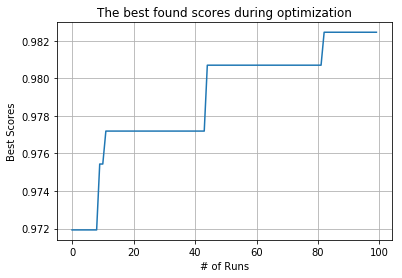

In [5]:
import numpy as np
from sklearn import svm
from sklearn import datasets
from matplotlib import pylab as plt
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from seqmm.pybayopt import TPESklearn

sx = MinMaxScaler()
dt = datasets.load_breast_cancer()
x = sx.fit_transform(dt.data)
y = dt.target

ParaSpace = {'C':     {'Type': 'continuous', 'Range': [-6, 16], 'Wrapper': np.exp2}, 
             'gamma': {'Type': 'continuous', 'Range': [-16, 6], 'Wrapper': np.exp2}}

estimator = svm.SVC()
score_metric = make_scorer(accuracy_score, True)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

clf = TPESklearn(estimator, cv, ParaSpace, max_runs = 100, refit = True, verbose = True)
clf.fit(x, y)
clf.plot_scores()

A contour plot based on a thorough grid search

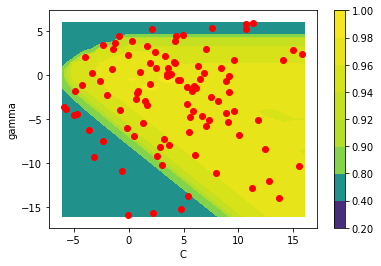

In [6]:
grid_num = 25
xlist = np.linspace(-6, 16, grid_num)
ylist = np.linspace(-16, 6, grid_num)
X, Y = np.meshgrid(xlist, ylist)
Z = np.zeros((grid_num,grid_num))
for i, C in enumerate(xlist):
    for j, gamma in enumerate(ylist):
        estimator = svm.SVC(C=2**C,gamma = 2**gamma)
        out = cross_val_score(estimator, x, y, cv = cv, scoring = score_metric)
        Z[j,i] = np.mean(out)
        
levels = [0.2, 0.4, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
cp = plt.contourf(X, Y, Z, levels)
plt.colorbar(cp)
plt.xlabel('C')
plt.ylabel('gamma')
plt.scatter(np.log2(clf.logs.loc[:,['C']]), 
            np.log2(clf.logs.loc[:,['gamma']]), color = "red")
plt.show()

# Example 2: Xgboost for Regression

Search completed in 42.93 seconds.
The best score is: -0.02885.
The best configurations are:
booster             : gblinear
max_depth           : 3
n_estimators        : 315
min_child_weight    : 6
subsample           : 0.29241
colsample_bytree    : 0.09618
learning_rate       : 0.93499
gamma               : 2e-05
reg_lambda          : 5e-05
reg_alpha           : 0.00032



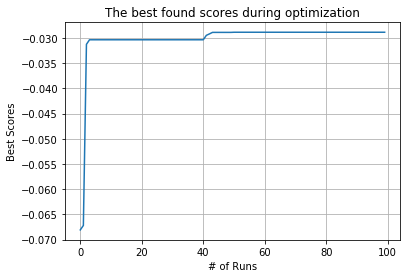

In [7]:
import numpy as np
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, mean_squared_error
from seqmm.pybayopt import TPESklearn

dt = datasets.load_diabetes()
sx = MinMaxScaler()
sy = MinMaxScaler()
x = sx.fit_transform(dt.data)
y = sy.fit_transform(dt.target.reshape([-1,1]))

ParaSpace = {'booster':          {'Type': 'categorical', 'Mapping': ['gbtree', 'gblinear']},
             'max_depth':        {'Type': 'integer',     'Mapping': np.linspace(2,10,9)}, 
             'n_estimators':     {'Type': 'integer',     'Mapping': np.linspace(100,500,401)},
             'min_child_weight': {'Type': 'integer',     'Mapping': np.linspace(1,100,100)},
             'subsample':        {'Type': 'continuous',  'Range': [0, 1],  'Wrapper': lambda x:x},
             'colsample_bytree': {'Type': 'continuous',  'Range': [0, 1],  'Wrapper': lambda x:x},
             'learning_rate':    {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x},
             'gamma':            {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x},
             'reg_lambda':       {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x},
             'reg_alpha':         {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x}}

estimator = xgb.XGBRegressor()
score_metric = make_scorer(mean_squared_error, False)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

clf = TPESklearn(estimator, cv, ParaSpace, max_runs = 100, refit = True, scoring = score_metric, verbose = True)
clf.fit(x, y)
clf.plot_scores()

 # Example 3: Kmeans for Unsupervised Clustering  

Search completed in 23.92 seconds.
The best score is: -0.69136.
The best configurations are:
n_clusters          : 9
tol                 : 0.0



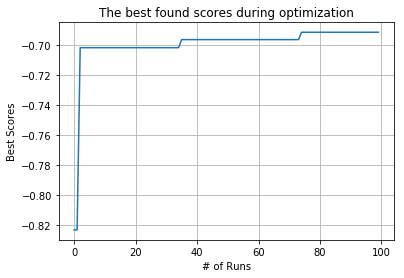

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler
from seqmm.pybayopt import TPESklearn

sx = MinMaxScaler()
dt = datasets.load_iris()
x = sx.fit_transform(dt.data)
y = dt.target.reshape([-1,1])

ParaSpace = {'n_clusters':  {'Type': 'integer',    'Mapping': np.linspace(2,9,8)}, 
             'tol':         {'Type': 'continuous', 'Range': [-6, -3], 'Wrapper': lambda x: 10**x}}

estimator = KMeans()
cv = KFold(n_splits=5, random_state=0, shuffle=True)

clf = TPESklearn(estimator, cv, ParaSpace, max_runs = 100, refit = True, verbose = True)
clf.fit(x, y)
clf.plot_scores()